# Loan Risk Prediction

```
Bidang perbankan sebagaimana bidang bisnis lainnya berusaha untuk menambah pemasukan dan menekan pengeluaran. Salah satu cara menambah pemasukan adalah dengan memberikan tawaran pinjaman pada masyarakat. Tetapi selain berpotensi menambah pemasukan, pinjaman tetap mengandung resiko yaitu gagal bayar atau tidak lancarnya pembayaran dari customer. Untuk mengatasi hal tersebut pihak bank perlu melakukan screening pada customer yang mengajukan pinjaman. Screening hanya sebagai penyaringan awal oleh pihak bank agar terhindar dari memberikan pinjaman pada customer yang beresiko. Penentuan pinjaman apakah dia akan beresiko atau tidak bisa dibantu menggunakan sebuah permodelan machine learning berdasarkan data historis yang dimiliki pihak bank.
```

# Introduction

```
Ridhwan Muttaqien - Batch 06

Student of hacktiv8 with background in telecommunications engineering and had worked as a safety officer for 5 years
```

# External Link

```
Data Source : https://www.kaggle.com/datasets/sanjanchaudhari/loan-prediction-based-on-customer-behavior
              https://www.kaggle.com/datasets/shubhamsinha1107/indian-state-gdp-and-population?select=population.csv

Deployment : https://huggingface.co/spaces/Ridhwanm/final_project

```

# Working Area

## Importing Libraries

In [1]:
# import semua library yang akan digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
# menampilkan dataframe

df = pd.read_csv('Training Data.csv')
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
# overview data untuk mengecek tipe data dan ada tidaknya missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
# mengecek data duplikat

df.duplicated().sum()

0

`Tidak terdapat data terduplikasi`

In [6]:
# mengecek missing value

df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

`Tidak terdapat missing value`

In [7]:
# overview data dengan representasi numerik

df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


```
- kolom Id berisi data unik untuk setiap customer

- kolom Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS sekilas dapat disimpulkan terdistribusi normal karena nilai mean hampir sama dengan nilai mediannya

- kolom Risk_Flag bersifat kategorik dengan value 0 dan 1

- Income mayoritas customer berkisar di antara INR 2.118.806 - 7.875.428

- Umur mayoritas customer berkisar di antara 32 - 67 tahun 
```

## Exploratory Data Analysis

In [8]:
# melakukan looping untuk menampilkan jumlah value unik di tiap kolom

for i in df:
    print(i)
    print(df[i].nunique())
    print('-'*30)

Id
252000
------------------------------
Income
41920
------------------------------
Age
59
------------------------------
Experience
21
------------------------------
Married/Single
2
------------------------------
House_Ownership
3
------------------------------
Car_Ownership
2
------------------------------
Profession
51
------------------------------
CITY
317
------------------------------
STATE
29
------------------------------
CURRENT_JOB_YRS
15
------------------------------
CURRENT_HOUSE_YRS
5
------------------------------
Risk_Flag
2
------------------------------


`Kolom Profession, CITY, dan STATE memiliki high cardinality. Perlu dilakukan pengecekan pada kolom-kolom tersebut apakah bisa dikelompokkan menjadi beberapa kategori saja`

In [9]:
# menghitung jumlah customer sesuai profesi

df.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

`Data profesi dapat kita kelompokkan berdasarkan bidangnya agar jumlah value unik pada kolom ini tidak terlalu banyak`

In [3]:
# melakukan looping pada kolom Profession untuk membagi pekerjaan menjadi beberapa kelompok (handling high cardinality)

work = []

for wrk in df['Profession']:
    if wrk in ['Physician','Psychologist','Surgeon','Dentist']:
        work.append('Medical and Healthcare')
    elif wrk in ['Computer_hardware_engineer','Industrial_Engineer','Mechanical_engineer','Chemical_engineer','Biomedical_Engineer','Petroleum_Engineer','Design_Engineer',
                    'Civil_engineer','Technology_specialist','Software_Developer','Computer_operator','Technician','Engineer']:
        work.append('Engineering and Technology')
    elif wrk in ['Web_designer','Fashion_Designer','Graphic_Designer','Artist','Designer','Architect']:
        work.append('Creative and Design')
    elif wrk in ['Statistician','Financial_Analyst','Consultant','Economist','Chartered_Accountant']:
        work.append('Financial and Business')
    elif wrk in ['Air_traffic_controller','Flight_attendant','Aviator']:
        work.append('Aviation and Transportation')
    elif wrk in ['Magistrate','Politician','Lawyer','Civil_servant','Police_officer','Army_officer','Official']:
        work.append('Legal and Government')
    elif wrk in ['Drafter','Technical_writer','Secretary','Librarian']:
        work.append('Writing and Communication')
    elif wrk in ['Hotel_Manager','Comedian','Chef','Firefighter','Lawyer']:
        work.append('Hospitality and Services')
    elif wrk in ['Microbiologist','Scientist','Geologist','Surveyor','Analyst']:
        work.append('Science and Research')
df['Profession'] = work

In [11]:
df.STATE.value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

`Terdapat input data yang salah yaitu Uttar_Pradesh[5]. Dapat digabungkan ke dalam state Uttar_Pradesh`

In [4]:
# melakukan looping pada kolom STATE untuk mengubah input data yang salah

provinsi = []

for prov in df['STATE']:
    if prov in ['Uttar_Pradesh[5]']:
        provinsi.append('Uttar_Pradesh')
    else:
        provinsi.append(prov)

df['STATE'] = provinsi

`Kolom STATE dan CITY merupakan nama daerah sehingga tidak bisa digabungkan kecuali membagi daerah tersebut berdasarkan kategori letak seperti utara, selatan.dll.`

In [5]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Engineering and Technology,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Engineering and Technology,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Writing and Communication,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Engineering and Technology,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Legal and Government,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Medical and Healthcare,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Legal and Government,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Engineering and Technology,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Creative and Design,Pondicherry,Puducherry,0,10,0


```
- Kolom Id tidak akan digunakan pada model karena hanya berisi value unik untuk setiap customer dan secara logika tidak akan berpengaruh sebagai feature

- Kolom City dan state tidak akan digunakan pada model karena pada dasarnya seseorang tidak dianggap beresiko jika diberikan pinjaman hanya karena berdomisili di suatu tempat tertentu

- Blacklist terhadap customer yang berasal dari kota tertentu bisa saja terjadi jika berdasarkan data historis didapatkan bahwa terdapat jumlah pinjaman bermasalah dalam jumlah yang besar di kota tersebut. Sedangkan dari dataset yang digunakan, tidak terdapat kota dengan jumlah pinjaman beresiko yang menonjol diantara kota lainnya.
```

In [6]:
df_model = df.drop(['Id','CITY','STATE'],axis=1)
df_model

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Engineering and Technology,3,13,0
1,7574516,40,10,single,rented,no,Engineering and Technology,9,13,0
2,3991815,66,4,married,rented,no,Writing and Communication,4,10,0
3,6256451,41,2,single,rented,yes,Engineering and Technology,2,12,1
4,5768871,47,11,single,rented,no,Legal and Government,3,14,1
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Medical and Healthcare,6,11,0
251996,2843572,26,10,single,rented,no,Legal and Government,6,11,0
251997,4522448,46,7,single,rented,no,Engineering and Technology,7,12,0
251998,6507128,45,0,single,rented,no,Creative and Design,0,10,0


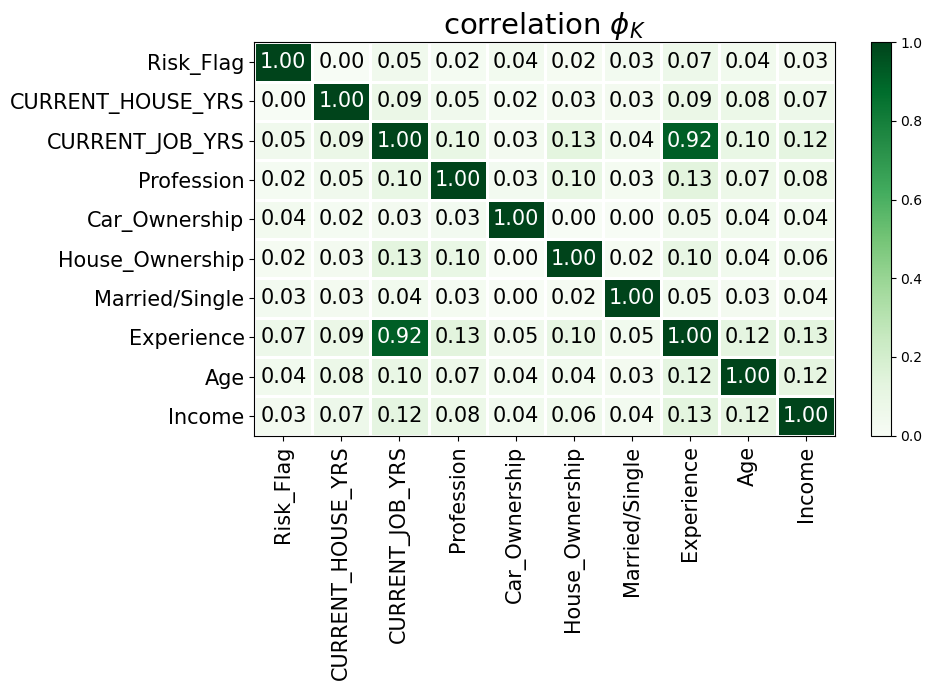

In [17]:
# menampilkan korelasi antar kolom pada dataframe dengan heatmap
import phik
from phik.report import plot_correlation_matrix
interval_cols = ['Income','Age']
phik_overview = df_model.phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 7))
plt.tight_layout()

```
- Angka korelasi kolom terhadap target (Risk_Flag) bernilai kecil bisa disebabkan karena kolom-kolom tersebut tidak memiliki korelasi yang linear dengan target
- Terlihat dari heatmap, kolom Experience memiliki korelasi yang tinggi dengan kolom CURRENT_JOB_YRS. Sehingga akan digunakan salah satu kolom saja sebagai feature
- Akan dilakukan pengecekan di langkah selanjutnya apakah kolom-kolom tersebut signifikan terhadap target
```

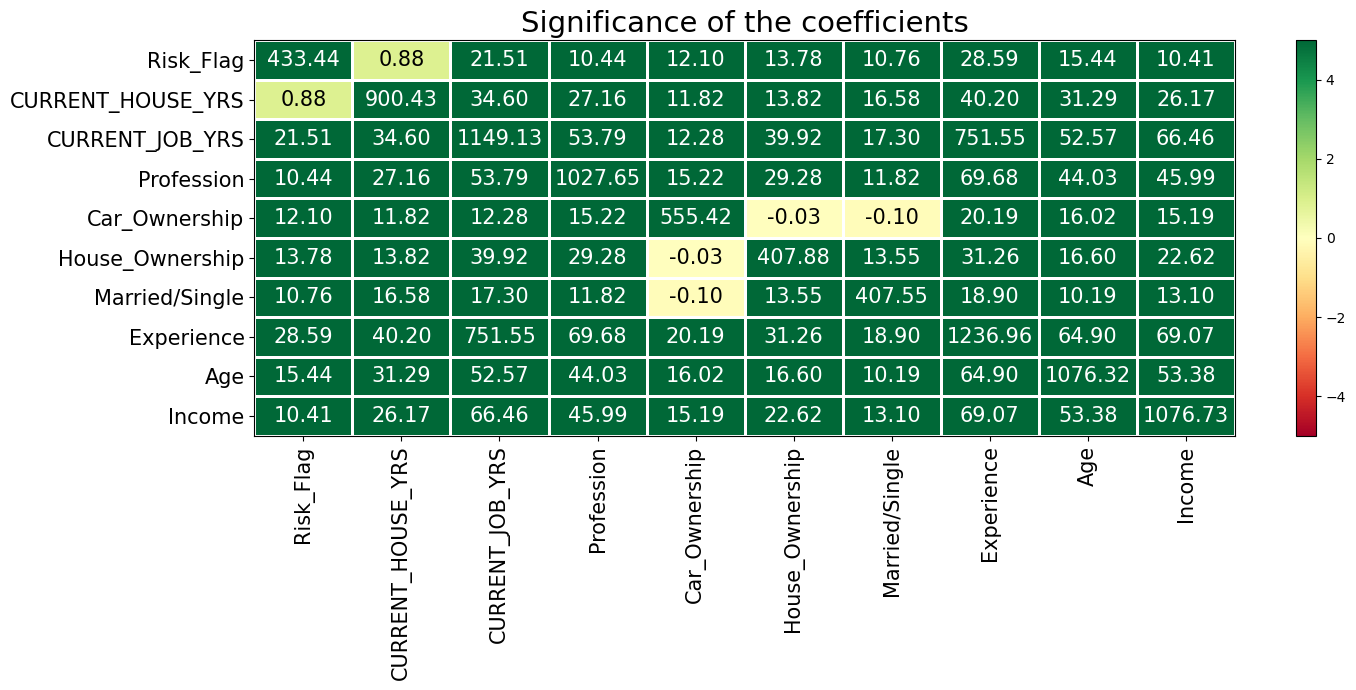

In [20]:
significance_overview = df_model.significance_matrix(interval_cols=interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(15, 7))
plt.tight_layout()

`Berdasarkan heatmap significance hanya kolom CURRENT_HOUSE_YRS yang tidak signifikan terhadap target`

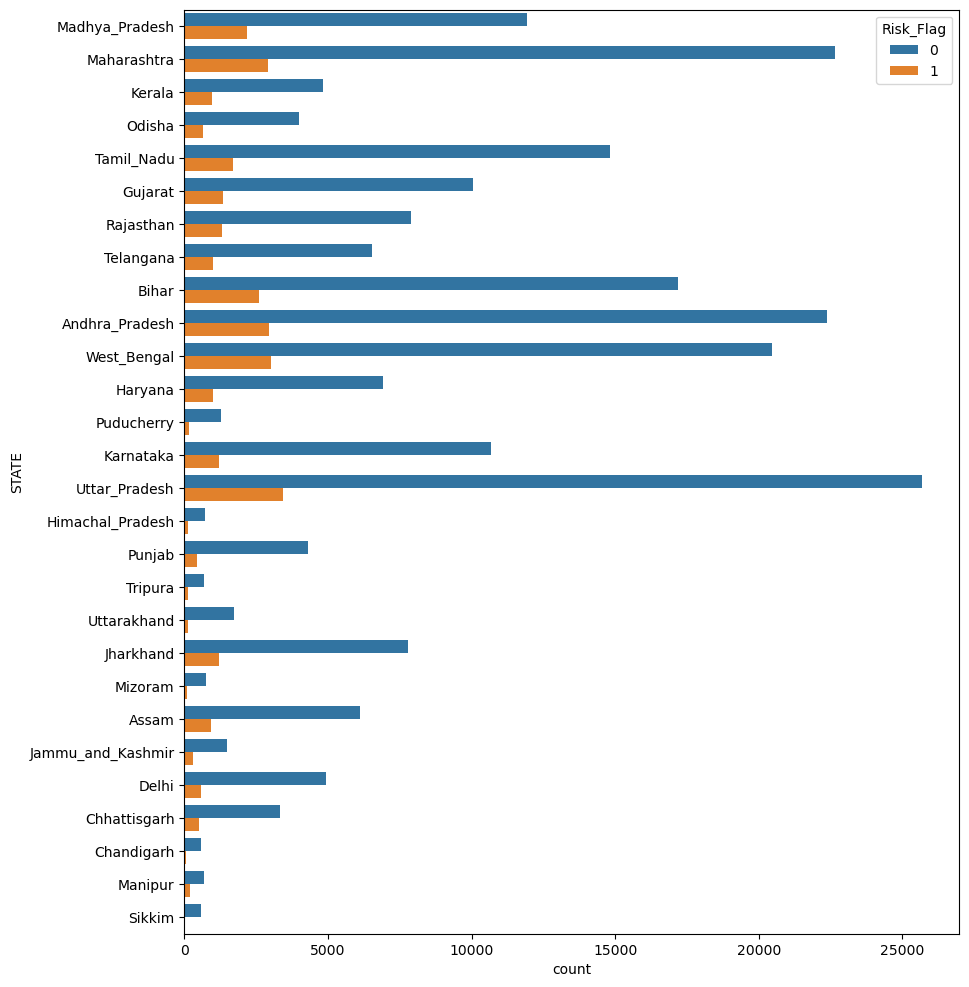

In [45]:
# menampilkan jumlah customer per state berdasarkan status resiko

plt.figure(figsize=(10, 12))
sns.countplot(data=df,y='STATE',hue='Risk_Flag')
plt.show()

```
- Secara umum di semua state, jumlah customer dengan pinjaman tidak beresiko jauh lebih banyak dari yang beresiko. Ini adalah salah satu sebab state tidak dimasukkan sebagai feature untuk memprediksi status resiko

- Uttar Pradesh adalah state dengan jumlah customer dengan pinjaman beresiko terbanyak tapi ini sangat wajar karena Uttar Pradesh juga menjadi state dengan jumlah customer terbanyak

- Maharashtra, Bihar, Andhra Pradesh, dan West Bengal memiliki jumlah customer dengan pinjaman beresiko yang berdekatan sedangkan memiliki jumlah customer yang berbeda-beda. Perlu ditinjau lebih lanjut untuk keempat state tersebut
```

In [ ]:
risk_df = df[df['Risk_Flag']==1] # membuat dataframe yang hanya berisi pinjaman beresiko

safe_df = df[df['Risk_Flag']==0] # membuat dataframe yang hanya berisi pinjaman tidak beresiko

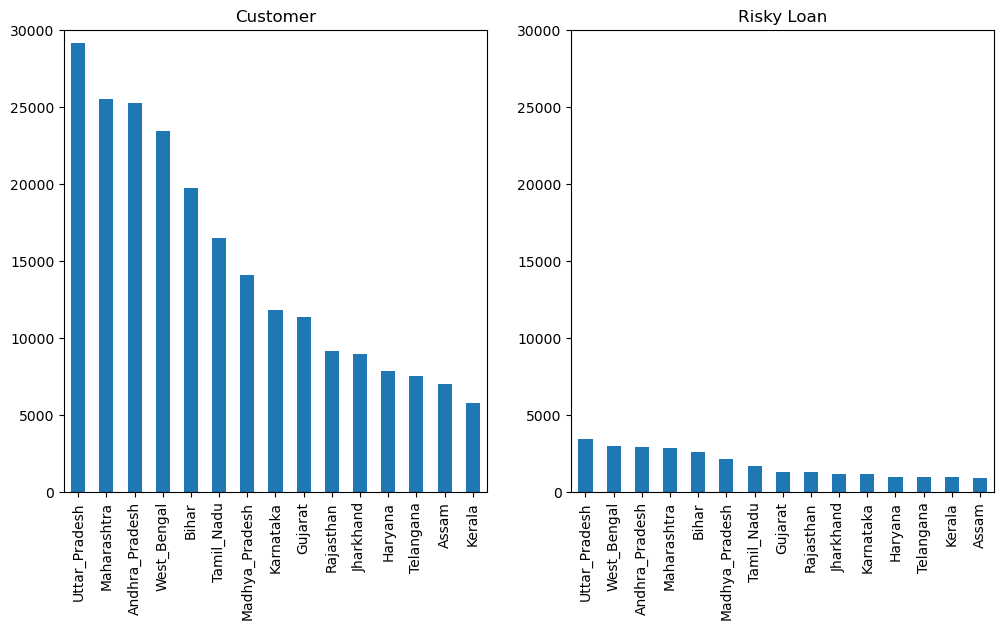

In [47]:
# menampilkan visualisasi perbandingan jumlah customer dengan jumlah pinjaman beresiko berdasarkan 15 state teratas

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

df['STATE'].value_counts().head(15).plot(kind='bar', ax=ax[0])
risk_df['STATE'].value_counts().head(15).plot(kind='bar', ax=ax[1])

ax[0].set_title('Customer')
ax[1].set_title('Risky Loan')

ax[0].set_ylim(0, 30000)
ax[1].set_ylim(0, 30000)

plt.show()

```
- Secara umum, 15 state teratas dalam jumlah customer berisi state yang sama dengan 15 state teratas dalam jumlah pinjaman beresiko

- Andhra Pradesh dan West Bengal memiliki tingkat pinjaman beresiko yang lebih besar jika dibandingkan dengan Maharashtra padahal jumlah customer di kedua state tersebut lebih sedikit dari Maharashtra

- Karnataka menempati urutan ke-8 dari jumlah customer tetapi jumlah pinjaman beresiko nya menempati urutan ke-11. Bisa disimpulkan Kamataka menjadi state yang cukup aman untuk diberikan pinjaman

- Jumlah customer berdasarkan state juga tergantung dari jumlah populasi di tiap state. Akan ditinjau di langkah selanjutnya
```

In [74]:
# loading data populasi

pop_df = pd.read_csv('population.csv')
pop_df

,state,1951,1961,1971,1981,1991,2001,2011,2021,data
0,Andaman & Nicobar Island,31.0,64.0,115.0,189.0,281.0,356.0,381.0,399.0,Total Population
1,Andhra Pradesh,31115.0,35983.0,43503.0,53551.0,66508.0,76210.0,84581.0,91702.0,Total Population
2,Arunachal Pradesh,NaN,337.0,468.0,632.0,865.0,1098.0,1384.0,1712.0,Total Population
3,Assam,8029.0,10837.0,14625.0,18041.0,22414.0,26656.0,31206.0,35999.0,Total Population
4,Bihar,29085.0,34841.0,42126.0,52303.0,64531.0,82999.0,104099.0,128500.0,Total Population
...,...,...,...,...,...,...,...,...,...,...
226,Tamil Nadu,232.0,259.0,317.0,372.0,429.0,480.0,555.0,555.0,density
227,Tripura,61.0,109.0,148.0,196.0,263.0,305.0,350.0,350.0,density
228,Uttar Pradesh,250.0,291.0,348.0,436.0,548.0,690.0,829.0,829.0,density
229,Uttarakhand,55.0,67.0,84.0,107.0,133.0,159.0,189.0,189.0,density


```
- Data terkait populasi memiliki beberapa jenis, bisa dilihat pada kolom 'data'. Perlu dicek data apa saja yang dimiliki.
- Angka dalam representasi ribuan. Contoh total populasi tahun 2021 di Andhra Pradesh = 91702, berarti jumlah penduduk adalah 91.702.000 jiwa
```

In [85]:
# mengecek kategori di kolom 'data'

pop_df['data'].unique()

array(['Total Population', 'Population in Rural Area',
       'Population in Urban Area', 'Decadal Growth', 'Sex Ratio',
       'Literacy Rate', 'density'], dtype=object)

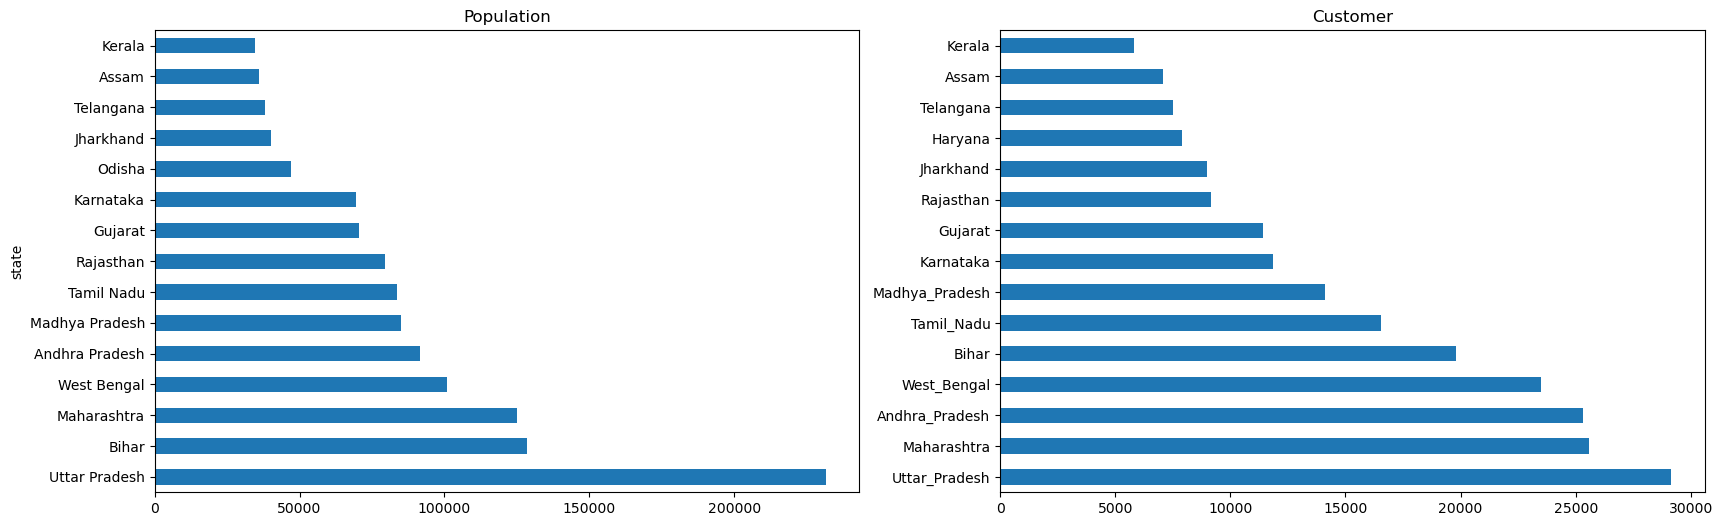

In [93]:
pop_new = pop_df[pop_df['data']=='Total Population'] # membuat dataframe total populasi

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 6)) 

pop_new.groupby('state')['2021'].sum().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[0]) # visualisasi populasi per state
df['STATE'].value_counts().head(15).plot(kind='barh', ax=ax[1]) # visualisasi customer per state

ax[0].set_title('Population')
ax[1].set_title('Customer')

plt.show()

```
- Odisha termasuk 15 state dengan jumlah populasi terbanyak tapi tidak termasuk dalam jumlah customer terbanyak

- Haryana tidak termasuk state dengan jumlah populasi terbanyak tapi termasuk ke dalam 15 teratas state dengan jumlah customer terbanyak
```

<Axes: xlabel='Income (in Million INR)', ylabel='STATE'>

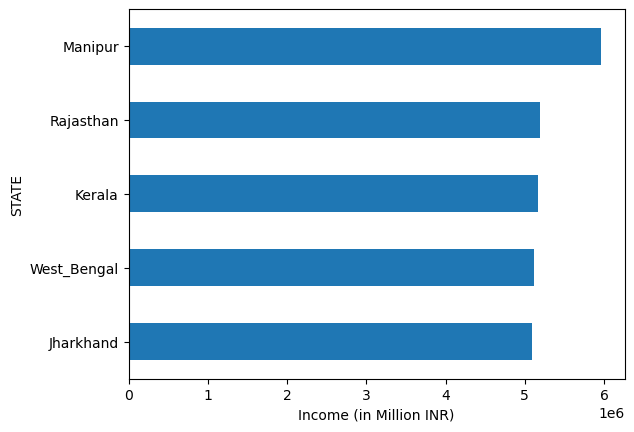

In [121]:
# menampilkan visualisasi income tertinggi di antara state

df.groupby('STATE')['Income'].mean().sort_values().tail().plot(kind='barh', xlabel='Income (in Million INR)')

`Manipur sebagai kota dengan income rata-rata paling tinggi di antara state yang lain ternyata tidak termasuk 15 besar state dengan jumlah customer terbanyak. Ini disebabkan karena Manipur memiliki jumlah populasi yang juga tidak banyak`

<Axes: xlabel='Age', ylabel='Count'>

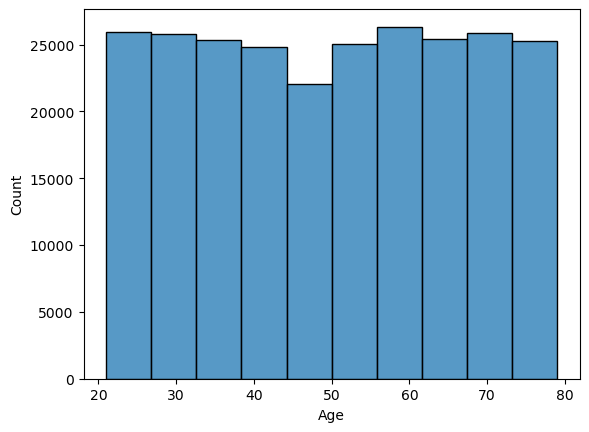

In [117]:
sns.histplot(data=df, x='Age', bins=10)

`Distribusi data umur pada customer bersifat normal dengan jumlah yang hampir merata di tiap jenjang umur. Ini menggambarkan bahwa bank ini dapat diterima oleh semua jenjang usia customer`

In [38]:
# menampilkan datframe dengan customer berusia di atas 60 tahun

old_df = df[df['Age']>=60]
old_df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
2,3,3991815,66,4,married,rented,no,Writing and Communication,Alappuzha,Kerala,4,10,0
5,6,6915937,64,0,single,rented,no,Legal and Government,Jalgaon,Maharashtra,0,12,0
10,11,4634680,78,7,single,rented,no,Aviation and Transportation,Hajipur[31],Bihar,7,12,0
16,17,7315840,71,8,married,rented,no,Aviation and Transportation,Kamarhati,West_Bengal,8,14,0
22,23,9157379,72,13,single,rented,yes,Engineering and Technology,Ajmer,Rajasthan,9,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251987,251988,6200535,72,6,single,rented,no,Medical and Healthcare,Sangli-Miraj_&_Kupwad,Maharashtra,6,12,0
251988,251989,8555531,68,7,single,rented,no,Medical and Healthcare,Unnao,Uttar_Pradesh,7,11,0
251990,251991,349066,68,4,single,rented,no,Writing and Communication,Madhyamgram,West_Bengal,4,11,0
251993,251994,8141027,60,10,single,rented,no,Writing and Communication,Bhusawal,Maharashtra,9,13,1


`Jumlah customer yang berada di usia pensiun yaitu 60 tahun ke atas adalah 85.316 orang atau 33,86 % dari keseluruhan customer. Ini cukup banyak dan bisa jadi segment customer yang ditawarkan produk-produk terkait asuransi jiwa dan kesehatan`

<Axes: >

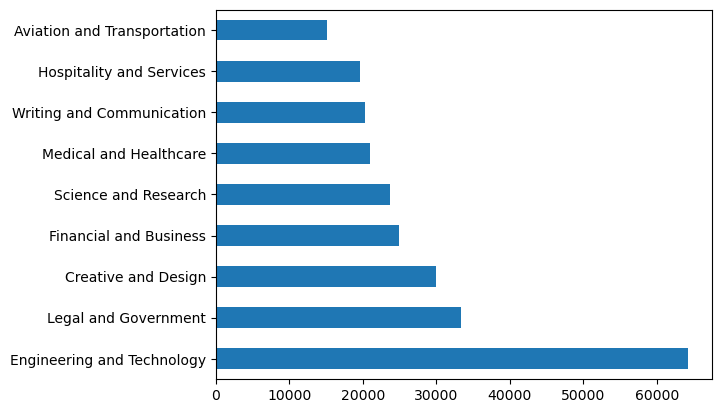

In [119]:
# menampilkan visualisasi pekerjaan dan jumlahnya

df['Profession'].value_counts().plot(kind='barh')

`Profesi di bidang engineering dan teknologi adalah bidang yang paling banyak di dataset. Promosi bisa diberikan pada customer dengan menawarkan potongan harga jika melakukan pembayaran barang-barang di bidang engineering dan teknologi seperti laptop. Atau diberikan promo potongan jika melakukan pembayaran training di bidang engineering dan teknologi`

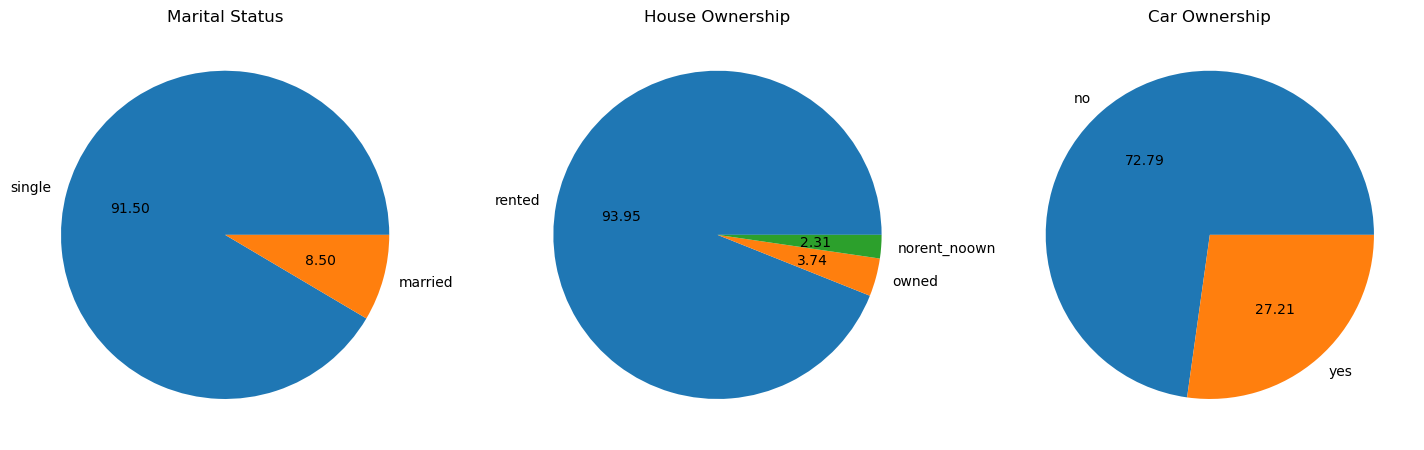

In [19]:
# visualisasi profiling customer dengan pinjaman beresiko

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18, 6))

risk_df['Married/Single'].value_counts().plot(kind='pie', autopct='%.2f', ax=ax[0])
risk_df['House_Ownership'].value_counts().plot(kind='pie', autopct='%.2f', ax=ax[1])
risk_df['Car_Ownership'].value_counts().plot(kind='pie', autopct='%.2f', ax=ax[2])

ax[0].set_title('Marital Status')
ax[0].set_ylabel(None) 
ax[1].set_title('House Ownership')
ax[1].set_ylabel(None)
ax[2].set_title('Car Ownership')
ax[2].set_ylabel(None)

plt.show()

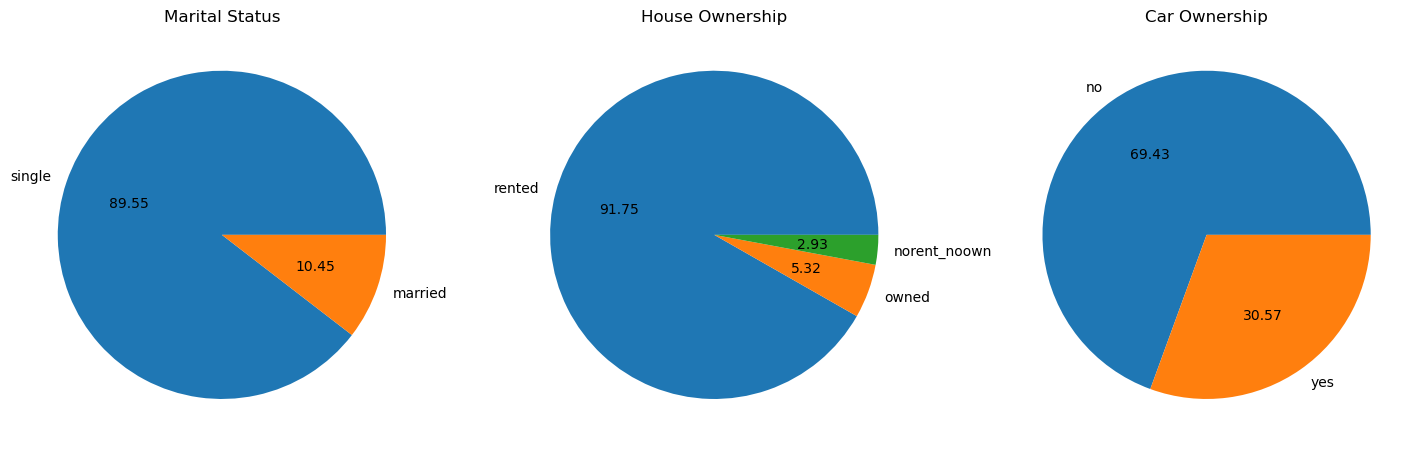

In [43]:
# visualisasi profiling customer dengan pinjaman tidak beresiko

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18, 6))

safe_df['Married/Single'].value_counts().plot(kind='pie', autopct='%.2f', ax=ax[0])
safe_df['House_Ownership'].value_counts().plot(kind='pie', autopct='%.2f', ax=ax[1])
safe_df['Car_Ownership'].value_counts().plot(kind='pie', autopct='%.2f', ax=ax[2])

ax[0].set_title('Marital Status')
ax[0].set_ylabel(None) 
ax[1].set_title('House Ownership')
ax[1].set_ylabel(None)
ax[2].set_title('Car Ownership')
ax[2].set_ylabel(None)

plt.show()

`Secara umum tidak ada perbedaan karakteristik antara customer yang pinjamannya beresiko dan tidak beresiko jika dilihat dari status perkawinan, kepemilikan rumah, dan kepemilikan mobil`

## Data Splitting

In [123]:
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

# memisahkan antara data feature dan target

X= df_model.drop('Risk_Flag',axis=1)
y= df_model['Risk_Flag']

# memisahkan antara data train dan data test

X_train,X_test, y_train, y_test= train_test_split(X,y, random_state=34, test_size=0.3, stratify=y)
X_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
114460,710851,21,19,single,rented,yes,Medical and Healthcare,14,12
171778,9930063,46,15,single,rented,yes,Hospitality and Services,5,10
20299,6605548,61,7,single,rented,no,Engineering and Technology,7,13
98957,1481287,33,19,single,rented,yes,Creative and Design,8,11
153021,7626654,60,12,single,rented,no,Engineering and Technology,12,13
...,...,...,...,...,...,...,...,...,...
95475,4329352,26,3,single,rented,no,Medical and Healthcare,3,12
214450,757592,23,5,married,rented,no,Financial and Business,3,10
12614,1034564,27,17,single,rented,no,Aviation and Transportation,8,12
117147,7452181,44,20,single,rented,yes,Medical and Healthcare,13,14


## Feature Engineering

### Handling Outliers

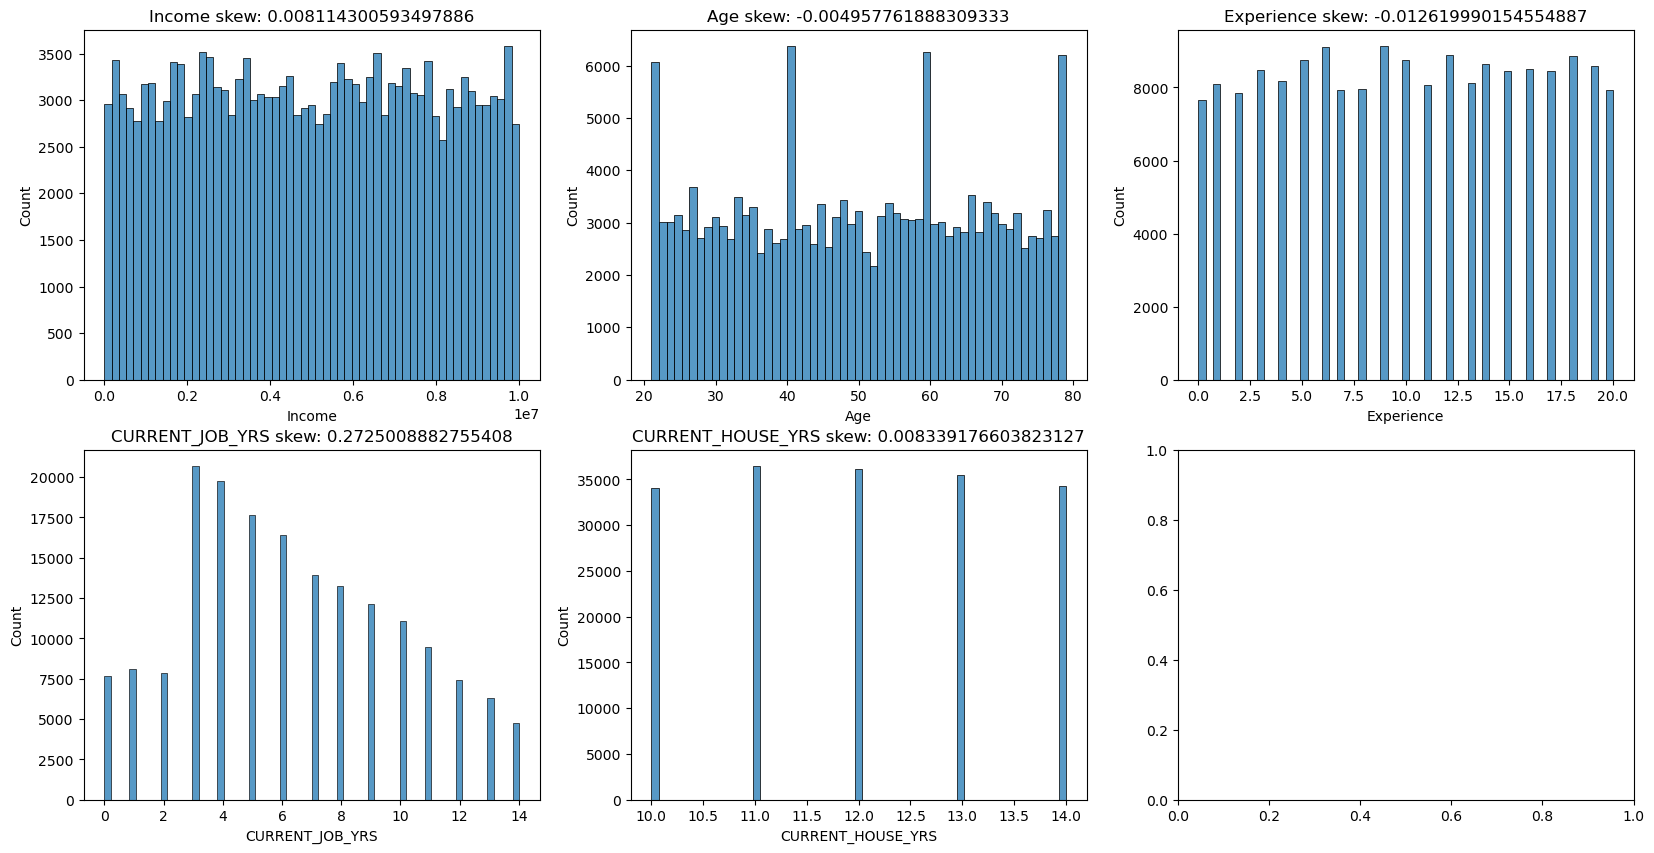

In [124]:
num_cols = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

# menampilkan distribusi data kolom bill

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=[20,10])
ax = ax.flatten()

for idx, col in enumerate(num_cols):
    sns.histplot(X_train[col], ax=ax[idx])
    ax[idx].set_title(f'{num_cols[idx]} skew: {X_train[col].skew()}')

`Semua kolom numerik memiliki distribusi normal karena rentang nilai skewness antara -0.5 dan 0.5`

In [125]:
# melakukan looping untuk menampilkan jumlah outliers pada kolom numerik

for i in X_train[num_cols]:
    upper = X_train[i].mean() + (X_train[i].std())*3 # mencari batas atas
    lower = X_train[i].mean() - (X_train[i].std())*3 # mencari batas bawah
    outlier = X_train[(X_train[i] <= lower) | (X_train[i] >= upper)]

    print('outliers percentage in',[i],' :', len(outlier)/X_train[i].shape[0] * 100, '%')

outliers percentage in ['Income']  : 0.0 %
outliers percentage in ['Age']  : 0.0 %
outliers percentage in ['Experience']  : 0.0 %
outliers percentage in ['CURRENT_JOB_YRS']  : 0.0 %
outliers percentage in ['CURRENT_HOUSE_YRS']  : 0.0 %


`Semua kolom numerik tidak memiliki outliers`

### Feature Scaling

In [126]:
# melakukan scaling pada features numerik

scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
114460,0.070127,0.000000,0.95,single,rented,yes,Medical and Healthcare,1.000000,0.50
171778,0.993005,0.431034,0.75,single,rented,yes,Hospitality and Services,0.357143,0.00
20299,0.660209,0.689655,0.35,single,rented,no,Engineering and Technology,0.500000,0.75
98957,0.147250,0.206897,0.95,single,rented,yes,Creative and Design,0.571429,0.25
153021,0.762425,0.672414,0.60,single,rented,no,Engineering and Technology,0.857143,0.75
...,...,...,...,...,...,...,...,...,...
95475,0.432353,0.086207,0.15,single,rented,no,Medical and Healthcare,0.214286,0.50
214450,0.074806,0.034483,0.25,married,rented,no,Financial and Business,0.214286,0.00
12614,0.102532,0.103448,0.85,single,rented,no,Aviation and Transportation,0.571429,0.50
117147,0.744960,0.396552,1.00,single,rented,yes,Medical and Healthcare,0.928571,1.00


In [127]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline([('scaler', MinMaxScaler())])

### Feature Encoding

In [128]:
# menentukan kolom kategorik dari dataset model

cat_columns = ['Married/Single','Car_Ownership','House_Ownership','Profession']
X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

In [129]:
cat_ord = ['Married/Single','Car_Ownership']
cat_ohe = ['House_Ownership','Profession']
ord_enc = OrdinalEncoder()
ohe_enc = OneHotEncoder(sparse_output=False)

X_train_cat_ord = pd.DataFrame(ord_enc.fit_transform(X_train_cat[cat_ord]))
X_train_cat_ord.columns = cat_ord

X_test_cat_ord = pd.DataFrame(ord_enc.transform(X_test_cat[cat_ord]))
X_test_cat_ord.columns = cat_ord

X_train_cat_ohe = pd.DataFrame(ohe_enc.fit_transform(X_train_cat[cat_ohe]))
X_train_cat_ohe.columns = ohe_enc.get_feature_names_out()

X_test_cat_ohe = pd.DataFrame(ohe_enc.transform(X_test_cat[cat_ohe]))
X_test_cat_ohe.columns = ohe_enc.get_feature_names_out()

In [130]:
cat_ord_pipeline = Pipeline([('ordinal_enc', OrdinalEncoder())])
cat_ohe_pipeline = Pipeline([('ohe_enc', OneHotEncoder(sparse=False))])
cat_pipeline = ColumnTransformer([
    ("ord", cat_ord_pipeline, cat_ord),
    ("ohe", cat_ohe_pipeline, cat_ohe)])

In [131]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_columns),
        ])

In [132]:
# Feature Scaling

X_train_imbalanced_num = X_train[num_cols].reset_index().drop(['index'], axis = 1)
X_train_imbalanced_cat = X_train[cat_columns].reset_index().drop(['index'], axis = 1)

# Numeric Scaling

X_train_imbalanced_num = num_pipeline.fit_transform(X_train_imbalanced_num)
X_train_imbalanced_cat = cat_pipeline.fit_transform(X_train_imbalanced_cat)

c:\Users\Ridhwan\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [133]:
original_list = list(range(14))
string_list = [str(item) for item in original_list]

In [134]:
X_train_imb_num_df = pd.DataFrame(data=X_train_imbalanced_num, columns=num_cols)
X_train_imb_cat_df = pd.DataFrame(data=X_train_imbalanced_cat, columns=string_list)
X_train_imbalanced_new = pd.concat([X_train_imb_num_df, X_train_imb_cat_df], axis=1)
X_train_imbalanced_new


,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.070127,0.000000,0.95,1.000000,0.50,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.993005,0.431034,0.75,0.357143,0.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.660209,0.689655,0.35,0.500000,0.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.147250,0.206897,0.95,0.571429,0.25,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.762425,0.672414,0.60,0.857143,0.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176395,0.432353,0.086207,0.15,0.214286,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
176396,0.074806,0.034483,0.25,0.214286,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
176397,0.102532,0.103448,0.85,0.571429,0.50,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176398,0.744960,0.396552,1.00,0.928571,1.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [135]:
from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_train_imbalanced_new, y_train)

## Modeling

In [137]:
from pycaret.classification import *
df_tmk = pd.concat([X_resampled,y_resampled],axis=1)
exp_clf = setup(data=df_tmk, target='Risk_Flag')

,Description,Value
0,Session id,4204
1,Target,Risk_Flag
2,Target type,Binary
3,Original data shape,"(174545, 20)"
4,Transformed data shape,"(174545, 20)"
5,Transformed train set shape,"(122181, 20)"
6,Transformed test set shape,"(52364, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [138]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8962,0.9374,0.5201,0.5943,0.5547,0.4963,0.4977,1.8740
et,Extra Trees Classifier,0.8951,0.9375,0.4948,0.5939,0.5398,0.4811,0.4837,1.3410
knn,K Neighbors Classifier,0.8883,0.8708,0.5031,0.5561,0.5282,0.4651,0.4658,2.3220
dt,Decision Tree Classifier,0.8803,0.8535,0.5415,0.5178,0.5293,0.4608,0.4610,0.2920
lightgbm,Light Gradient Boosting Machine,0.8781,0.8152,0.0301,0.7392,0.0578,0.0485,0.1325,0.3140
gbc,Gradient Boosting Classifier,0.8759,0.6316,0.0023,0.6948,0.0046,0.0038,0.0355,1.4760
ada,Ada Boost Classifier,0.8758,0.5762,0.0013,0.6567,0.0025,0.0021,0.0250,0.4640
lr,Logistic Regression,0.8757,0.5509,0.0000,0.0000,0.0000,0.0000,0.0000,0.5590
nb,Naive Bayes,0.8757,0.5447,0.0000,0.0000,0.0000,0.0000,0.0000,0.1630
svm,SVM - Linear Kernel,0.8757,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2310


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

`Best perform model dengan default parameter adalah Random Forest Classifier`

In [140]:
# membuat pipeline random forest

from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as imbpipe
rfc = RandomForestClassifier()

rfcpipe = imbpipe([
            ('preprocess', full_pipeline),
            ('under_sampl', TomekLinks()),
            ('rfc', RandomForestClassifier(random_state=34))
])

In [143]:
param_grid = {
    'rfc__n_estimators': [ 100, 150],
    'rfc__max_depth': [ 10, 20],
    'rfc__min_samples_split': [ 5, 10]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rfcpipe, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          MinMaxScaler(clip=False,
                                                                                                       copy=True,
                                                                                                       feature_range=(0,
                                                                                                                      1)))],
                                                                                  verbose=False),
                                                                         ['Income',
                                                                          'Age',
                                                                          'Experience',
                                                                          'CURRENT_JO...
                                                               min_samples_split=2,
                                                               min_weight_fraction_leaf=0.0,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               oob_score=False,
                                                               random_state=34,
                                                               verbose=0,
                                                               warm_start=False))],
                                verbose=False),
             n_jobs=None,
             param_grid={'rfc__max_depth': [10, 20],
                         'rfc__min_samples_split': [5, 10],
                         'rfc__n_estimators': [100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

`Hyperparameter tuning menggunakan grid search dengan mengkombinasikan 3 parameter. Proses training berlangsung cukup lama yaitu 16 menit. Ini disebabkan oleh jumlah data yang hampir 175000 baris`

In [144]:
# best parameter dengan kombinasi seperti di atas
grid_search.best_params_

{'rfc__max_depth': 20, 'rfc__min_samples_split': 5, 'rfc__n_estimators': 100}

In [145]:
# hasil model
grid_search.best_score_

0.3951046808987428

In [147]:
# melakukan prediksi model hasil tuning dengan data test dan train

from sklearn.metrics import classification_report
model = grid_search.best_estimator_

model.fit(X_train, y_train)

model_train = model.predict(X_train)
model_test = model.predict(X_test)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95    154703
           1       0.73      0.35      0.47     21697

    accuracy                           0.90    176400
   macro avg       0.82      0.67      0.71    176400
weighted avg       0.89      0.90      0.89    176400

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     66301
           1       0.65      0.27      0.38      9299

    accuracy                           0.89     75600
   macro avg       0.78      0.63      0.66     75600
weighted avg       0.87      0.89      0.87     75600



`Dihasilkan performa model yang lebih buruk setelah di tuning. Ini mungkin terjadi karena pemilihan parameter yang kurang tepat`

In [148]:
rfcpipe_final = Pipeline([
            ('preprocess', full_pipeline),
            ('rfc', RandomForestClassifier())
])

rfcpipe_final.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxScaler(clip=False,
                                                                                copy=True,
                                                                                feature_range=(0,
                                                                                               1)))],
                                                           verbose=False),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS']),
                                                 ('cat',
                                                  ColumnTr...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [150]:
import joblib
with open('loanrisk_pred.pkl', 'wb') as file_1:
  joblib.dump(rfcpipe_final, file_1)

## Conclusions

Bidang perbankan sebagaimana bidang bisnis lainnya berusaha untuk menambah pemasukan dan menekan pengeluaran. Salah satu cara menambah pemasukan adalah dengan memberikan tawaran pinjaman pada masyarakat. Tetapi selain berpotensi menambah pemasukan, pinjaman tetap mengandung resiko yaitu gagal bayar atau tidak lancarnya pembayaran dari customer. Untuk mengatasi hal tersebut pihak bank perlu melakukan screening pada customer yang mengajukan pinjaman. Screening hanya sebagai penyaringan awal oleh pihak bank agar terhindar dari memberikan pinjaman pada customer yang beresiko. Penentuan pinjaman apakah dia akan beresiko atau tidak bisa dibantu menggunakan sebuah permodelan machine learning berdasarkan data historis yang dimiliki pihak bank.

Data yang digunakan adalah data open source dari kaggle dan berisi data bank di India. Dataset berisi customer ID, data demografi customer (umur, status perkawinan, domisili,dan pekerjaan), status kepemilikan aset, jumlah pendapatan, status resiko pinjaman. Digunakan juga data populasi di India.

Dari dataset dengan menganalisa kolom state dapat disimpulkan:
- secara umum di semua state, jumlah customer dengan pinjaman tidak beresiko jauh lebih banyak dari yang beresiko. Ini adalah salah satu sebab state tidak dimasukkan sebagai feature untuk memprediksi status resiko. Sebab kita tidak mau kehilangan potensi customer yang besar.

- Uttar Pradesh adalah state dengan jumlah customer dengan pinjaman beresiko terbanyak tapi ini sangat wajar karena Uttar Pradesh juga menjadi state dengan jumlah customer terbanyak bahkan jika dilihat dari data populasi Uttar Pradesh juga state dengan jumlah populasi terbanyak.

- State Maharashtra, Andhra Pradesh, dan West Bengal dimana ketiganya memiliki jumlah customer dengan pinjaman beresiko yang berdekatan sedangkan memiliki jumlah customer yang berbeda-beda. Andhra Pradesh dan West Bengal memiliki tingkat pinjaman beresiko yang lebih besar jika dibandingkan dengan Maharashtra padahal jumlah customer di kedua state tersebut lebih sedikit dari Maharashtra. Maka ini bisa jadi perhatian bagi pihak bank ketika akan memberikan pinjaman pada customer di Andhra Pradesh dan West Bengal. 

- State Karnataka juga terlihat menarik dimana Karnataka menempati urutan ke-8 dari jumlah customer tetapi jumlah pinjaman beresiko nya menempati urutan ke-11. Bisa disimpulkan Kamataka menjadi state yang cukup aman untuk diberikan pinjaman.

- Jika mengacu pada data populasi, Odisha termasuk 15 state dengan jumlah populasi terbanyak tapi tidak termasuk dalam jumlah customer terbanyak. Maka ini bisa menjadi saran bagi tim marketing untuk memperluas customer di Odisha

- State Haryana tidak termasuk state dengan jumlah populasi terbanyak tapi termasuk ke dalam 15 teratas state dengan jumlah customer terbanyak. Maka customer di Haryana bisa diberikan promo untuk menjaga loyalitas customer di Haryana

- State Manipur dengan income rata-rata tertinggi ternyata tidak termasuk 15 besar state dengan jumlah customer terbanyak. Ini disebabkan karena Manipur memiliki jumlah populasi yang juga tidak banyak. Tapi ini juga perlu jadi perhatian jika pihak bank ingi memperluas pasar

Dari kolom umur terlihat bank ini memiliki penerimaan yang cukup baik pada tiap jenjang umur dibuktikan dari jumlah yang hampir rata di tiap jenjang umur. Terlihat juga ada 33.86% customer bank yang ada di usia pensiun di India yaitu di atas 60 tahun. Pada customer ini bisa ditawarkan produk asuransi jiwa atau kesehatan.

Dari kolom profesi, customer paling banyak bekerja di bidang engineering dan teknologi. Untuk itu bisa diberikan promo potongan harga untuk pembelian barang-barang terkait teknologi contohnya laptop. Atau bisa juga potongan harga jika mengikuti pelatihan di bidang engineering dan teknologi jika melakukan pembayaran dari bank kita.

Model dibuat dengan semua kolom sebagai feature kecuali customer id, city, dan state. Kemudian feature dilakukan preprocessing sehingga semua kolom terepresentasi ke dalam numerik. Disini digunakan library pycaret untuk mencari algoritma mana yang menghasilkan performa terbaik. Semua algoritma tersebut dengan default parameter. Dari hasil pycaret didapatkan Random forest classifier sebagai algoritma terbaik dengan performa 55.47%. Digunakan f1 score metrics evaluasi karena kita sama-sama tidak menginginkan kedua kondisi berikut yaitu customer yang tidak beresiko diprediksi beresiko atau customer beresiko diprediksi tidak beresiko.

Kemudian dilakukan hyperparameter tuning tetapi didapatkan hasil yang lebih buruk yaitu 47%. Ini bisa saja disebabkan oleh pemilihan parameter yang tidak tepat sehingga model menjadi overfit.

Improvement pada model bisa dilakukan dengan mengevaluasi feature yang digunakan untuk model dan atau mencoba teknik under sampling yang lain untuk mengatasi imbalanced data. Selain itu mungkin bisa ditambah kolom tentang jumlah tanggungan, jumlah pengeluaran, dan nilai aset yang dimiliki. Jumlah data yang besar membuat proses training pada model menjadi lama dan ini tentu harus dipertimbangkan karena berkaitan dengan cost. Bisa juga digunakan artificial neural network mengingat jumlah data yang digunakan cukup besar. 
